In [1]:
import sys
sys.path.append("..")  # Adds parent folder to Python path

import time
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

from inference import LogReIDInference # Import the LogReIDInference class



# Create the DATABASE (FAISS Vector Data Base) 

Edit the ```config.yaml``` file to provide the path to unique image directory

In [2]:
%run C:\Users\User\Desktop\Log_ReID\setup_database.py

FileNotFoundError: [Errno 2] No such file or directory: 'config.yaml'

# Query an Image

In [22]:
# Initialize the LogReIDInference class with the database folder path
inference_engine = LogReIDInference(
    database_folder="C:/Users/User/Desktop/Log_ReID/DATABASE", 
)

Loading FAISS index...
Loading models...
Loading database image indexes...


In [12]:
all_images = [p for p in Path(r"C:\Users\User\Downloads\test_dataset\test_dataset").iterdir()  if p.parts[-1].endswith('_R1.jpg')]

database_images = all_images[:100]
nondatabase_test_images = all_images[100:]
database_test_images = [p.with_name(p.name.replace('_R1.jpg', '_R3.jpg')) for p in database_images]

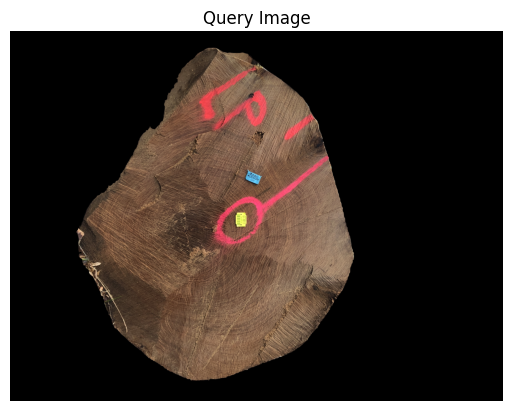

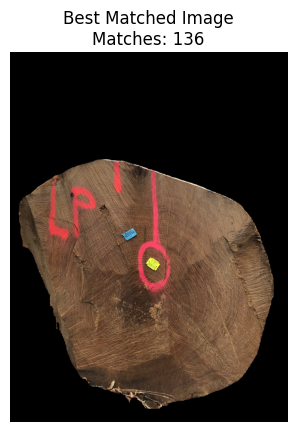

In [23]:
# Select a test image from the list of test images
query_image_path = database_test_images[40]

# Run the inference pipeline: first FAISS retrieval, then LightGlue matching
matched_objects = inference_engine.run_inference(query_image_path)

# Display the query image
plt.imshow(Image.open(query_image_path))
plt.title("Query Image")
plt.axis("off")
plt.show()

# If matches are found, display the best matched image
if len(matched_objects) > 0:
    plt.imshow(Image.open(matched_objects[0]['image']))
    plt.title(f"Best Matched Image\nMatches: {matched_objects[0]['match_num']}")
    plt.axis("off")
    plt.show()
else:
    # If no match is found, print a message
    print("No match found in the database.")
